In [1]:
import torch
from torch import einsum
from torch.linalg import eig, eigh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from VisualizationUtil import show_transformation_3d, show_transformation_2d, plot_tensors_3d

In [3]:
x = torch.tensor([[2, -3, 2],
                  [-3, 0, 1]], dtype=torch.float32)

In [4]:
sl, sr = x@x.T, x.T@x

In [5]:
eigh(sl)[1], eigh(sr)[1]

(tensor([[-0.4132, -0.9106],
         [-0.9106,  0.4132]]),
 tensor([[ 0.2417,  0.6660, -0.7057],
         [ 0.6447,  0.4333,  0.6298],
         [ 0.7252, -0.6072, -0.3246]]))

In [6]:
eigval_sl, eigvec_sl = eigh(sl)
eigval_sr, eigvec_sr = eigh(sr)

In [7]:
def ortho_test(eigvec):
    for i in range(len(eigvec)):
        for j in range(len(eigvec)):
            dot_prod = eigvec.T[i] @ eigvec.T[j].T
            if (dot_prod < 1.0e-8):
                print(0, end=" ")
            else:
                print(int(dot_prod), end=" ")
        print()
    print()

In [8]:
ortho_test(eigvec_sl)
ortho_test(eigvec_sr)

1 0 
0 1 

1 0 0 
0 1 0 
0 0 1 



/tmp/ipykernel_11573/2361066476.py:4: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1682343995026/work/aten/src/ATen/native/TensorShape.cpp:3571.)
  dot_prod = eigvec.T[i] @ eigvec.T[j].T


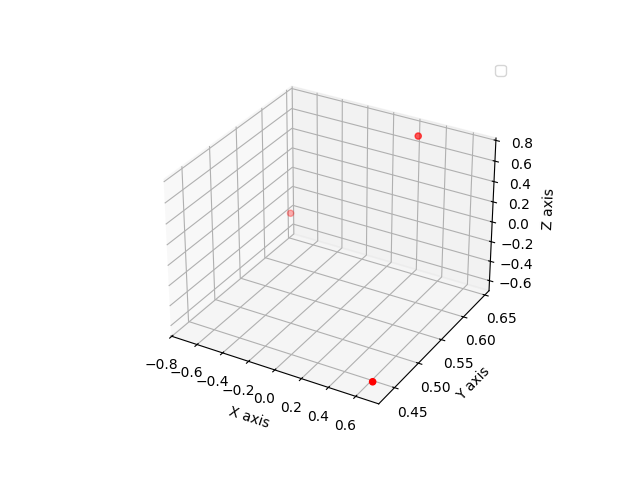

In [14]:
%matplotlib notebook
plot_tensors_3d(eigvec_sr.T)

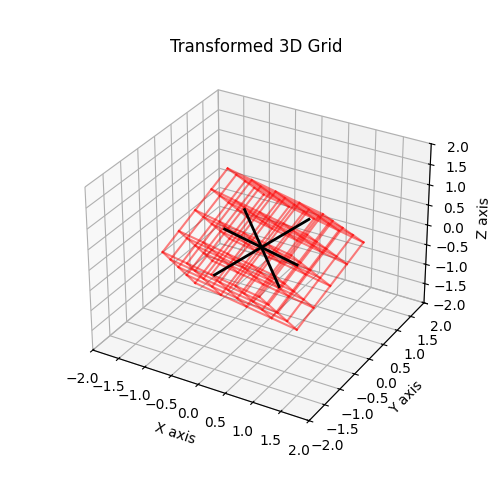

In [15]:
%matplotlib notebook
show_transformation_3d(matrix=eigvec_sr, show_base=False)